In [36]:
import sklearn.ensemble

from preprocessing.data_cleaning import get_cleaned_data, split_csv, get_features_label
from preprocessing.encoding import encode_data
from exploration.data_correlations import plot_correlations
from exploration.data_statistics import plot_patientwise_errors, plot_labels_pie_chart, plot_blood_draw_statistics
from exploration.midterm_exploration import plot_feature_against_diagnosis
from utils.utils import log_features
from modeling.mrmr import perform_mrmr

In [37]:
df = encode_data(get_cleaned_data())
df = df[df["P1_PT_TYPE"] != 3]
log_features(df)
blood, clinical = split_csv(df)

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (4).

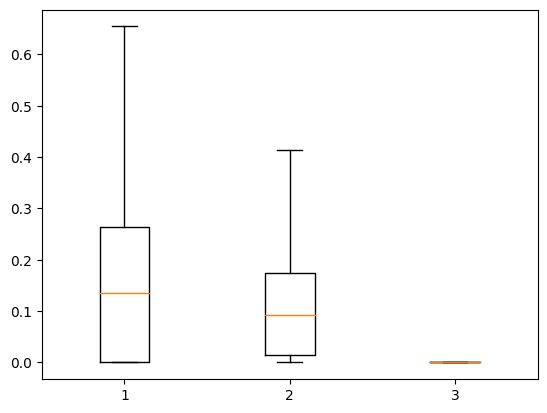

In [38]:
plot_patientwise_errors(
    df,
    ["C1_WAIS3_DIGTOT", "B1_BMI", "RBM_Insulin"],
    ["Race", "WAIS3 Digits Score", "BMI", "Insulin"],
    png="Patientwise Errors"
)

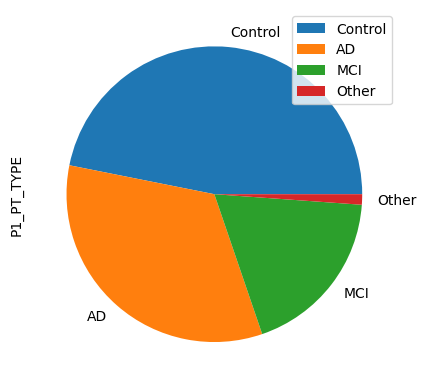

In [39]:
plot_labels_pie_chart(df, png="Pie Chart of Diagnoses")

In [40]:
plot_blood_draw_statistics(df, png="Blood Draw Proportions")

KeyError: "['RBM_Rule_Based_Medicine'] not in index"

In [41]:
plot_correlations(df)

TypeError: get_top_abs_correlations() takes 1 positional argument but 2 were given

In [42]:
import pandas as pd
import numpy as np

y, X = get_features_label(df)
y = pd.Series(y)
(features, score, redundancy_matrix) = perform_mrmr(X, y, X.shape[1], scr = True)
score = score.sort_values(ascending=False)
score = score.reset_index()

pairs = {}
for num_features in range(1,X.shape[1]):
    print(num_features)
    test_df = df[score['index'][:num_features]]
    test_df["P1_PT_TYPE"] = df["P1_PT_TYPE"]
    micro_f1_score = test_mrmr_model(test_df)
    pairs[num_features] = micro_f1_score

In [43]:
import pandas as pd

y, X = get_features_label(df)
y = pd.Series(y)

features, score = perform_mrmr(X, y, 10, True)

100%|██████████| 20/20 [00:03<00:00,  5.68it/s]


C1_CDRSUM          8132.977874
C1_CDRGLOB         7184.537972
C1_MMSE            5009.280126
F2_IADLTOTSCR      3462.017137
C1_WMS3_LMEM2      3349.076426
C1_WMS3_LMEM1      3020.248620
C1_SS_TRAILB       2664.449483
C1_WMS3_VRI        2285.585124
C1_SS_TRAILA       1580.524794
PATID              1094.031005
D1_DEMUNIF_1.0     1020.394470
D1_total            864.334175
F1_PSMSTOTSCR       803.298768
AGE                 768.691543
C1_WAIS3_DIGTOT     657.274179
A1_HISPANIC_1.0     603.713379
B5_AGITSEV_1.0      368.541901
B5_APASEV_2.0       355.130981
B5_APASEV_1.0       353.767975
D1_FTDIF_1.0        342.458221
dtype: float64

C1_CDRSUM          8132.977874
C1_CDRGLOB         7184.537972
C1_MMSE            5009.280126
F2_IADLTOTSCR      3462.017137
C1_WMS3_LMEM2      3349.076426
C1_WMS3_LMEM1      3020.248620
C1_SS_TRAILB       2664.449483
C1_WMS3_VRI        2285.585124
C1_SS_TRAILA       1580.524794
PATID              1094.031005
D1_DEMUNIF_1.0     1020.394470
D1_total            864.334175
F1_PSMSTOTSCR       803.298768
AGE                 768.691543
C1_WAIS3_DIGTOT     657.274179
A1_HISPANIC_1.0     603.713379
B5_AGITSEV_1.0      368.541901
B5_APASEV_2.0       355.130981
B5_APASEV_1.0       353.767975
D1_FTDIF_1.0        342.458221
dtype: float64

C1_CDRSUM          8132.977874
C1_CDRGLOB         7184.537972
C1_MMSE            5009.280126
F2_IADLTOTSCR      3462.017137
C1_WMS3_LMEM2      3349.076426
C1_WMS3_LMEM1      3020.248620
C1_SS_TRAILB       2664.449483
C1_WMS3_VRI        2285.585124
C1_SS_TRAILA       1580.524794
PATID              1094.031005
D1_DEMUNIF_1.0     1020.394470
D1_total            864.334175
F1_PSMSTOTSCR       803.298768
AGE                 768.691543
C1_WAIS3_DIGTOT     657.274179
A1_HISPANIC_1.0     603.713379
B5_AGITSEV_1.0      368.541901
B5_APASEV_2.0       355.130981
B5_APASEV_1.0       353.767975
D1_FTDIF_1.0        342.458221
dtype: float64


In [ ]:
import pandas as pd
label_encoded_df = pd.get_dummies(blood, columns=["P1_PT_TYPE"])

correlations = blood.corr().abs().unstack()
ad_correlations = correlations["P1_PT_TYPE"].sort_values()
print(ad_correlations.index[:100])